## Harmonic Diatomic Molecule

- Let's use Hamilton's equations to solve the motion of a diatomic molecule
- We start by writing down the total kinetic and potential energies:

In [1]:
diatomicKineticEnergy = Sum[1/2 m[i] D[q[i][t], t]^2, {i, 2}];
diatomicPotentialEnergy["harmonic"] = -1 + 36 (-1 + q[2][t] - q[1][t])^2;

diatomicLagrangian = diatomicKineticEnergy - diatomicPotentialEnergy["harmonic"];
diatomicHamiltonian = diatomicKineticEnergy + diatomicPotentialEnergy["harmonic"];

- We then use our definition of the canonical momentum to define substitution rules:

p[1][t]                p[2][t]
{(q[1])'[t] -> -------, (q[2])'[t] -> -------}
                m[1]                   m[2]
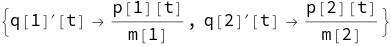

In [5]:
diatomicCanonicalSubstitutions = First[
  Solve[{
    p[1][t] == D[diatomicLagrangian, q[1]'[t]],
    p[2][t] == D[diatomicLagrangian, q[2]'[t]]
    }, {q[1]'[t], q[2]'[t]}]
]

- Note: We could've easily inferred this form
  - In your mechanics class, you probably stated this as the momentum of a free particle
  - However, this programmatic way generalizes very nicely to more complex systems

In [6]:
diatomicCanonicalHamiltonian = diatomicHamiltonian /. diatomicCanonicalSubstitutions;

- We can then use this to write down Hamilton's equations for the harmonic diatomic molecule:

In [7]:
diatomicHamiltonsEquations = {
 D[q[1][t], t] == D[diatomicCanonicalHamiltonian, p[1][t]],
 D[q[2][t], t] == D[diatomicCanonicalHamiltonian, p[2][t]],
 D[p[1][t], t] == -D[diatomicCanonicalHamiltonian, q[1][t]],
 D[p[2][t], t] == -D[diatomicCanonicalHamiltonian, q[2][t]]
};

- We are now ready to solve our differential equations symbolically
- We need to specify two initial conditions
  - we'll stretch our spring by 25% and release it with zero initial momentum

In [8]:
diatomicInitialConditions = {
  q[1][0] == -5/8, q[2][0] == 5/8, 
  p[1][0] == 0, p[2][0] == 0
};

In [9]:
{
  diatomicMoleculePosition[m1_, m2_][1][t_],
  diatomicMoleculePosition[m1_, m2_][2][t_],
  diatomicMoleculeMomentum[m1_, m2_][1][t_],
  diatomicMoleculeMomentum[m1_, m2_][2][t_]
  } = FullSimplify[
  DSolveValue[
    Join[diatomicHamiltonsEquations, diatomicInitialConditions],
    {q[1][t], q[2][t], p[1][t], p[2][t]}, t]
   ] /. {m[1] -> m1, m[2] -> m2};

- Finally, let's visualize our harmonic dimer!

In [16]:
spring[start_ : {0, 0}, end_ : {1, 0}, n_ : 20, w_ : .2] := 
 With[{vector = end - start}, 
  BSplineCurve@(start + # & /@ 
       Transpose[{vector, -Cross[vector]} . {(# - 1)/(2 n), 
          Re[I^#] w/Norm[vector]}] &@Range[2 n + 1])]

visualizeDiatomicMolecule[{x1_, x2_}, {m1_, m2_}, colors_ : {Red, Blue}][t_] := 
 Graphics[{
  spring[{x1[t] + Sqrt[m1], 0}, {x2[t] - Sqrt[m2], 0}],
  colors[[1]], Disk[{x1[t], 0}, Sqrt[m1]], colors[[2]], Disk[{x2[t], 0}, Sqrt[m2]]
  }, PlotRange -> {{-1.1, 1.1}, {-1/4, 1/4}}, Axes -> True, Ticks -> None, ImageSize -> 350]

baseHarmonicGraphic = 
  Plot[-1 + 36 (-1 + ρ)^2, {ρ, 5/8, 11/8}, 
   PlotStyle -> Directive[Blue, Thick], Frame -> True, FrameStyle -> Directive[Black, Thick], 
   FrameLabel -> {"Normalized separation distance", "Potential Energy"},
   BaseStyle -> 14, ImageSize -> 350, GridLines -> {{1}, None}];

visualizeDiatomicMoleculePlusPotential[{x1_, x2_}, {m1_, m2_}, colors_ : {Red, Blue}][t_] := 
 Block[{distance = x2[t] - x1[t]}, 
  Show[baseHarmonicGraphic, 
   Graphics[{PointSize[0.0375], 
     Point[{distance, -1 + 36 (-1 + distance)^2}], 
     Inset[visualizeDiatomicMolecule[{x1, x2}, {m1, m2}, colors][t], {1, 3.5}, {0, 0}, 0.5]}]]]

Manipulate[PaneSelector[{1 -> -Graphics-, 2 -> -Graphics-, 3 -> -Graphics-, 
 
>     4 -> -Graphics-, 5 -> -Graphics-, 6 -> -Graphics-, 7 -> -Graphics-, 
 
>     8 -> -Graphics-, 9 -> -Graphics-, 10 -> -Graphics-, 11 -> -Graphics-, 
 
>     12 -> -Graphics-, 13 -> -Graphics-, 14 -> -Graphics-, 15 -> -Graphics-, 
 
>     16 -> -Graphics-, 17 -> -Graphics-, 18 -> -Graphics-, 19 -> -Graphics-, 
 
>     20 -> -Graphics-}, Dynamic[i22], ImageSize -> All, Alignment -> Automatic, 
 
>    BaseStyle -> ListAnimateCore, TransitionDirection -> Horizontal, 
 
>    TransitionDuration -> 0.5, TransitionEffect -> Automatic], 
 
>   {{i22, 1, }, 1, 20, 1, AnimationRate -> Automatic, DisplayAllSteps -> True, 
 
>    AppearanceElements -> 
 
>     {ProgressSlider, PlayPauseButton, FasterSlowerButtons, DirectionButton}}, 
 
>   Paneled -> False, ControlType -> Animator, AppearanceElements -> None, 
 
>   DefaultBaseStyle -> ListAnimate, DefaultLabelStyle -> ListAnimateLabel, 
 
>   SynchronousUpdating -> True, Method -> 
 
>    {DynamicCore -> False, TemplateExpand -> True}, 
 
>   Bookmarks -> {min :> {i22 = 1}, max :> {i22 = 20}}]
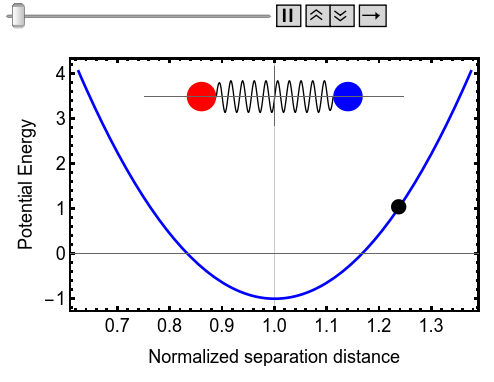

In [20]:
ListAnimate[
Table[visualizeDiatomicMoleculePlusPotential[{
 diatomicMoleculePosition[1/4^2, 1/4^2][1],
 diatomicMoleculePosition[1/4^2, 1/4^2][2]}, {1/8^2, 1/8^2}][t], 
 {t, Subdivide[0,Pi/24,20]//Rest}],
Paneled -> False]